In [1]:
!pip install fcapy[all]
!pip install frozendict
!pip install ipynb
!pip install sparselinear
!pip install bitsets
!pip install bitarray
import torch
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.0.0+cuda118.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.9/162.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.3/285.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=cf6bffc5232ca56fad2e9837daeab223aa4d054c2d84eed7ef9f2d12d6399583
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


Looking in links: https://data.pyg.org/whl/torch-2.0.0+cuda118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-scatter: filename=torch_scatter-2.1.2-cp310-cp310-linux_x86_64.whl size=495091 sha256=ec7863d4a044e4a5134a03b3c42f62034d2c0fffb9f4c9f10ddbb556628fe8dd
  Stored in directory: /root/.cache/pip/wheels/92/f1/2b/3b46d54b134259f58c8363568569053248040859b1a145b3ce
Successfully built torch-scatter
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cuda118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for torch-sparse: filename=torch_sparse-0.6.18-cp310-cp310-linux_x86_64.whl size=1035675 sha256=a72186f331238db32965f44b6c0d9402e1442bdbc4490001741e0ea8780de304
  Stored in directory: /root/.cache/pip/wheels/c9/dd/0f/a6a16f9f3b0236733d257b4b4ea91b548b984a341ed3b8f38c
Successfully buil

In [2]:
import numpy as np
import pandas as pd

# Data loading and preparing

In [3]:
data = pd.read_csv('Employee.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [5]:
data['PaymentTier'] = data['PaymentTier'].astype(str)
data['Gender'] = (data['Gender']=='Male').astype(int)
data['EverBenched'] = (data['EverBenched']=='Yes').astype(int)

# ML

In [85]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline

In [86]:
X,y = data.drop(['LeaveOrNot'],axis=1), data['LeaveOrNot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=True,random_state=100)

In [87]:
from sklearn.compose import ColumnTransformer

cat_features = list(X_train.select_dtypes(object).columns)
ct = ColumnTransformer([('encode_cats', OneHotEncoder(drop='first'), cat_features)],
                       remainder='passthrough')

## Naive Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB


model = Pipeline([
    ('ct',ct),
    ('rf', GaussianNB())
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Score: {f1_score(y_test, y_pred)}')

Score: 0.537917087967644


## Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
model = Pipeline([
    ('ct',ct),
    ('rf', LogisticRegression(fit_intercept=False))
])

model.fit(X_train, y_train)
y_pred_l = model.predict(X_test)

print(f'Score: {f1_score(y_test, y_pred_l)}')

Score: 0.51338199513382


## Random Forest

### Base model

In [90]:
from sklearn.ensemble import RandomForestClassifier

model = Pipeline([
    ('ct',ct),
    ('rf', RandomForestClassifier())
])


model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f'Score: {f1_score(y_test, y_pred)}')

Score: 0.7439999999999999


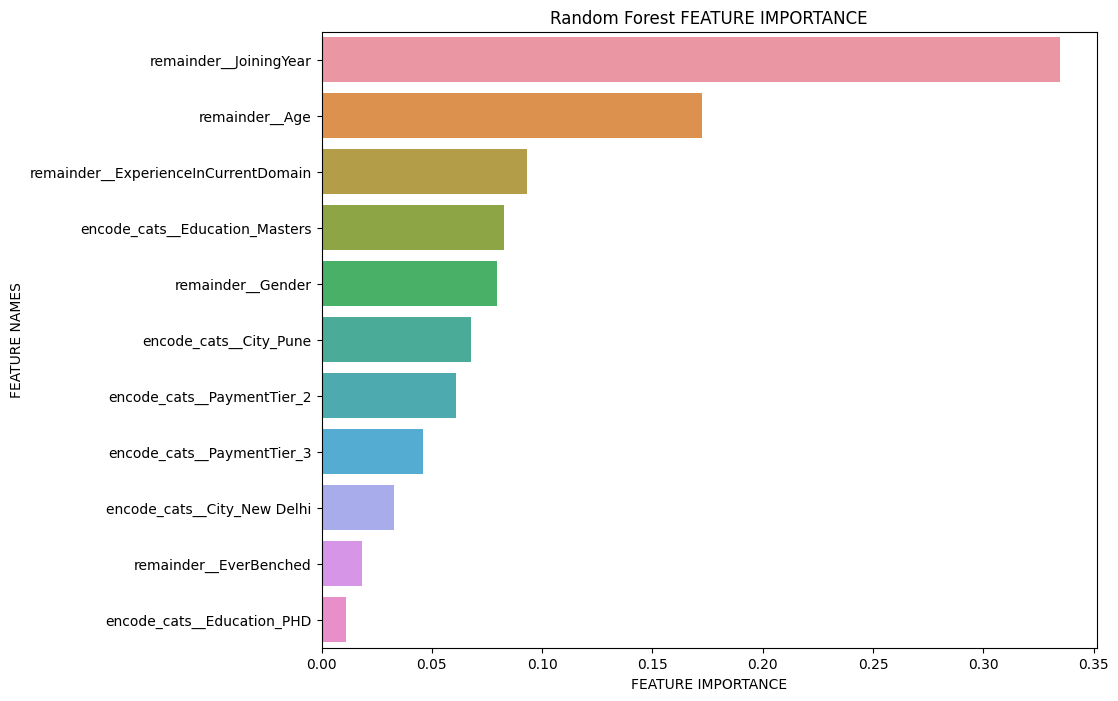

In [243]:
importance = model['rf'].feature_importances_
names = model['ct'].get_feature_names_out()
importance = custom_functions.plot_feature_importance(importance,names,'Random Forest ',save=True)

### Tuning parameters

In [12]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.8 MB/s eta 0:00:00


In [13]:
import optuna
from optuna.visualization import plot_optimization_history
from sklearn.model_selection import cross_val_score

In [14]:
model = Pipeline([
    ('ct',ct),
    ('rf', RandomForestClassifier())
])

def objective(trial):
    params = {
        'rf__criterion' : trial.suggest_categorical('rf__criterion',["gini", "entropy", "log_loss"]),
        'rf__n_estimators': trial.suggest_int('rf__n_estimators', 50, 1000),
        'rf__max_depth': trial.suggest_int('rf__max_depth', 4, 50),
        'rf__min_samples_split': trial.suggest_int('rf__min_samples_split', 2, 150),
        'rf__min_samples_leaf':trial.suggest_int('rf__min_samples_leaf', 1, 60)
    }
    model.set_params(**params)

    return  np.mean(cross_val_score(model, X_train, y_train, cv=3, n_jobs=-1,scoring='f1'))

In [15]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2023-12-17 16:28:02,867] A new study created in memory with name: no-name-a39d66f0-ba85-406a-aede-682376870d16
[I 2023-12-17 16:28:14,715] Trial 0 finished with value: 0.6810059080659842 and parameters: {'rf__criterion': 'log_loss', 'rf__n_estimators': 319, 'rf__max_depth': 44, 'rf__min_samples_split': 18, 'rf__min_samples_leaf': 28}. Best is trial 0 with value: 0.6810059080659842.
[I 2023-12-17 16:28:26,076] Trial 1 finished with value: 0.6596176115095783 and parameters: {'rf__criterion': 'entropy', 'rf__n_estimators': 710, 'rf__max_depth': 21, 'rf__min_samples_split': 90, 'rf__min_samples_leaf': 29}. Best is trial 0 with value: 0.6810059080659842.
[I 2023-12-17 16:28:38,237] Trial 2 finished with value: 0.7008337775661894 and parameters: {'rf__criterion': 'log_loss', 'rf__n_estimators': 644, 'rf__max_depth': 36, 'rf__min_samples_split': 73, 'rf__min_samples_leaf': 13}. Best is trial 2 with value: 0.7008337775661894.
[I 2023-12-17 16:28:47,891] Trial 3 finished with value: 0.698962

In [16]:
model.set_params(**study.best_params)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f'Score: {f1_score(y_test, y_pred)}')

Score: 0.7790575916230366


## Catboost


### Base model

In [19]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00


In [20]:
X_train_small, X_val, y_train_small, y_val = train_test_split(X_train, y_train, test_size=0.33,shuffle=True,random_state=100)

In [21]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier()
clf.fit(X_train_small, y_train_small,
        cat_features=cat_features,
        eval_set=(X_val, y_val),
        verbose=False
)
y_pred = clf.predict(X_test)
print(f'Score: {f1_score(y_test, y_pred)}')

Score: 0.7657754010695187


### Tuning parameters

In [22]:
def objective_catboost(trial,X, y,def_params):
    cat_features = list(X.select_dtypes('object').columns)
    X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,stratify=y)

    grid_params = {
        'iterations': trial.suggest_int('iterations', 50, 1000, step=50),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-5, 1e0),
        'l2_leaf_reg': trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        'loss_function': trial.suggest_categorical('loss_function',['Logloss','CrossEntropy']),
        'random_strength':trial.suggest_int("random_strength", 1,10),
        'max_bin':trial.suggest_categorical('max_bin', [2,3,4,5,6,8,10,20,30]),
        'bootstrap_type':trial.suggest_categorical('bootstrap_type',['Bayesian','Bernoulli','MVS']),
        'max_depth':trial.suggest_int('max_depth', 4,12),
        'colsample_bylevel':trial.suggest_float('colsample_bylevel', 0.01, 0.1, log=True)}

    if grid_params["bootstrap_type"] == "Bayesian":
              grid_params["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif grid_params["bootstrap_type"] == "Bernoulli":
              grid_params["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)

    if grid_params['loss_function'] =='Logloss':
        grid_params['auto_class_weights'] = trial.suggest_categorical('auto_class_weights', [None,'Balanced','SqrtBalanced'])

    clf = CatBoostClassifier(**grid_params,**def_params)

    clf.fit(X_train, y_train, eval_set = [(X_val,y_val)])
    y_pred = clf.predict(X_val)
    f1 = f1_score(y_val, y_pred)

    return f1

def tune(objective, X, y,n_trials=100):

    cat_features = list(X.select_dtypes('object').columns)
    def_params = {
    'cat_features':cat_features,
    'custom_metric':'AUC',
    'one_hot_max_size':2,
    'fold_len_multiplier':1.01,
    'early_stopping_rounds':20,
    'random_seed':42,
    'verbose':False,
    'allow_const_label':True,
    'use_best_model':True
    }
    study = optuna.create_study(direction="maximize")
    func = lambda trial: objective(trial, X, y, def_params)
    study.optimize(func, n_trials=n_trials)
    params = study.best_params
    params.update(def_params),
    best_score = study.best_value
    print(f"Best score: {best_score}\n")
    print(f"Optimized parameters: {params}\n")
    return params, study

In [23]:
params_cat, study_cat = tune(objective_catboost, X_train, y_train)

[I 2023-12-17 16:42:03,181] A new study created in memory with name: no-name-9f6798a4-73b4-44a2-b0de-3f1e0e946ae2
<ipython-input-22-e0ad69849fac>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform("learning_rate", 1e-5, 1e0),
[I 2023-12-17 16:42:04,280] Trial 0 finished with value: 0.17872340425531913 and parameters: {'iterations': 700, 'learning_rate': 0.010557683871738964, 'l2_leaf_reg': 0.0018190642506176924, 'loss_function': 'Logloss', 'random_strength': 3, 'max_bin': 30, 'bootstrap_type': 'Bernoulli', 'max_depth': 8, 'colsample_bylevel': 0.01960036953723069, 'subsample': 0.8062432411764197, 'auto_class_weights': None}. Best is trial 0 with value: 0.17872340425531913.
<ipython-input-22-e0ad69849fac>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will 

Best score: 0.7990196078431373

Optimized parameters: {'iterations': 600, 'learning_rate': 0.08402636291372693, 'l2_leaf_reg': 0.002754279782490665, 'loss_function': 'Logloss', 'random_strength': 6, 'max_bin': 20, 'bootstrap_type': 'MVS', 'max_depth': 6, 'colsample_bylevel': 0.08798846336683971, 'auto_class_weights': 'Balanced', 'cat_features': ['Education', 'City', 'PaymentTier'], 'custom_metric': 'AUC', 'one_hot_max_size': 2, 'fold_len_multiplier': 1.01, 'early_stopping_rounds': 20, 'random_seed': 42, 'verbose': False, 'allow_const_label': True, 'use_best_model': True}



In [24]:
clf = CatBoostClassifier(**params_cat)
clf.fit(X_train_small, y_train_small,
        cat_features=cat_features,
        eval_set=(X_val, y_val),
        verbose=False
)
y_pred = clf.predict(X_test)
print(f'Score: {f1_score(y_test, y_pred)}')

Score: 0.7435424354243543


# Neural-FCA

In [159]:
import torch
from fcapy.context import FormalContext
from fcapy.lattice import ConceptLattice
import neural_lib as nl
import networkx as nx
import custom_functions

from fcapy.visualizer import LineVizNx
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = (1,1,1,1)

In [216]:
def build_ConceptNetwork(train_data, train_target, concepts_count, score_func=f1_score, score_name='f1_score'):
    K_train = FormalContext.from_pandas(train_data)
    L = ConceptLattice.from_context(K_train,algo='Sofia', is_monotone=True)

    for c in L:
        y_preds = np.zeros(K_train.n_objects)
        y_preds[list(c.extent_i)] = 1
        c.measures[score_name] = score_func(train_target, y_preds)

    best_concepts = list(L.measures[score_name].argsort()[::-1][:concepts_count])
    # assert len({g_i for c in L[best_concepts] for g_i in c.extent_i})==K_train.n_objects, "Selected concepts do not cover all train objects"

    cn = nl.ConceptNetwork.from_lattice(L, best_concepts, sorted(set(train_target)))
    return K_train, L, cn

In [217]:
def visualizer(cn, save=False, title=True,name=0):
    fig, ax = plt.subplots(figsize=(20,8))

    edge_weights = cn.edge_weights_from_network()

    vis = LineVizNx(
        node_label_font_size=14,
        node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes))+'\n\n',
        edge_cmap="hsv"
        )

    vis.draw_poset(
        cn.poset, ax=ax, node_color='black',
        flg_node_indices=False,
        node_label_func=lambda el_i, P: nl.neuron_label_func(el_i, P, set(cn.attributes), only_new_attrs=True)+'\n\n',
        edge_color=[edge_weights[edge] for edge in cn.poset.to_networkx().edges],
        edge_cmap=plt.cm.RdBu,
    )
    nx.draw_networkx_edge_labels(cn.poset.to_networkx(), vis.mover.pos, {k: f"{v:.1f}" for k,v in edge_weights.items()}, label_pos=0.7)

    if title:
        plt.title('Neural network with fitted edge weights', size=24, loc='center')
    plt.tight_layout()
    plt.subplots_adjust()
    if save:
        plt.savefig('fitted_network'+str(name)+'.png')
    plt.show()

In [218]:
X, y, = data.drop(['LeaveOrNot'],axis=1), data['LeaveOrNot']



## Simple binarization

In [219]:
X_bin0 = custom_functions.binarizer(X,list_bins=5)
X_train0, X_test0,y_train0, y_test0 = train_test_split(X_bin0, y, test_size=0.1, random_state=40,stratify=y)

/content/custom_functions.py:146: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  X_ = X_.astype(bool)


In [213]:
X_bin0.shape

(4653, 19)

In [223]:
K_train_0, L_0, cn_0 = build_ConceptNetwork(X_train0, y_train0,score_func=f1_score, concepts_count=7)

In [224]:
cn_0.fit(X_train0, y_train0,n_epochs=10000)

print('Class predictions \n', cn_0.predict(X_test0).numpy().astype(bool))
print('True classes \n', y_test0.values)

print("\nF1 score =", f1_score(y_test0.values, cn_0.predict(X_test0).numpy()))

Class predictions 
 [ True False  True False False False False  True False False  True False
 False  True False False False  True False  True False False False False
 False False  True False  True False False False False False  True False
 False False False False False False  True False  True False False False
 False False  True False False False False  True False False False False
  True False  True False False False False False False False False False
  True False False  True False False False False False  True False  True
 False False  True False  True  True  True False False  True  True False
  True False False  True False False False False False False False False
  True False  True False False False  True False False False False  True
 False False False False False False False False False False False False
 False  True False False False False False  True False False False False
 False  True False  True False False False False False  True False  True
 False  True False False False 

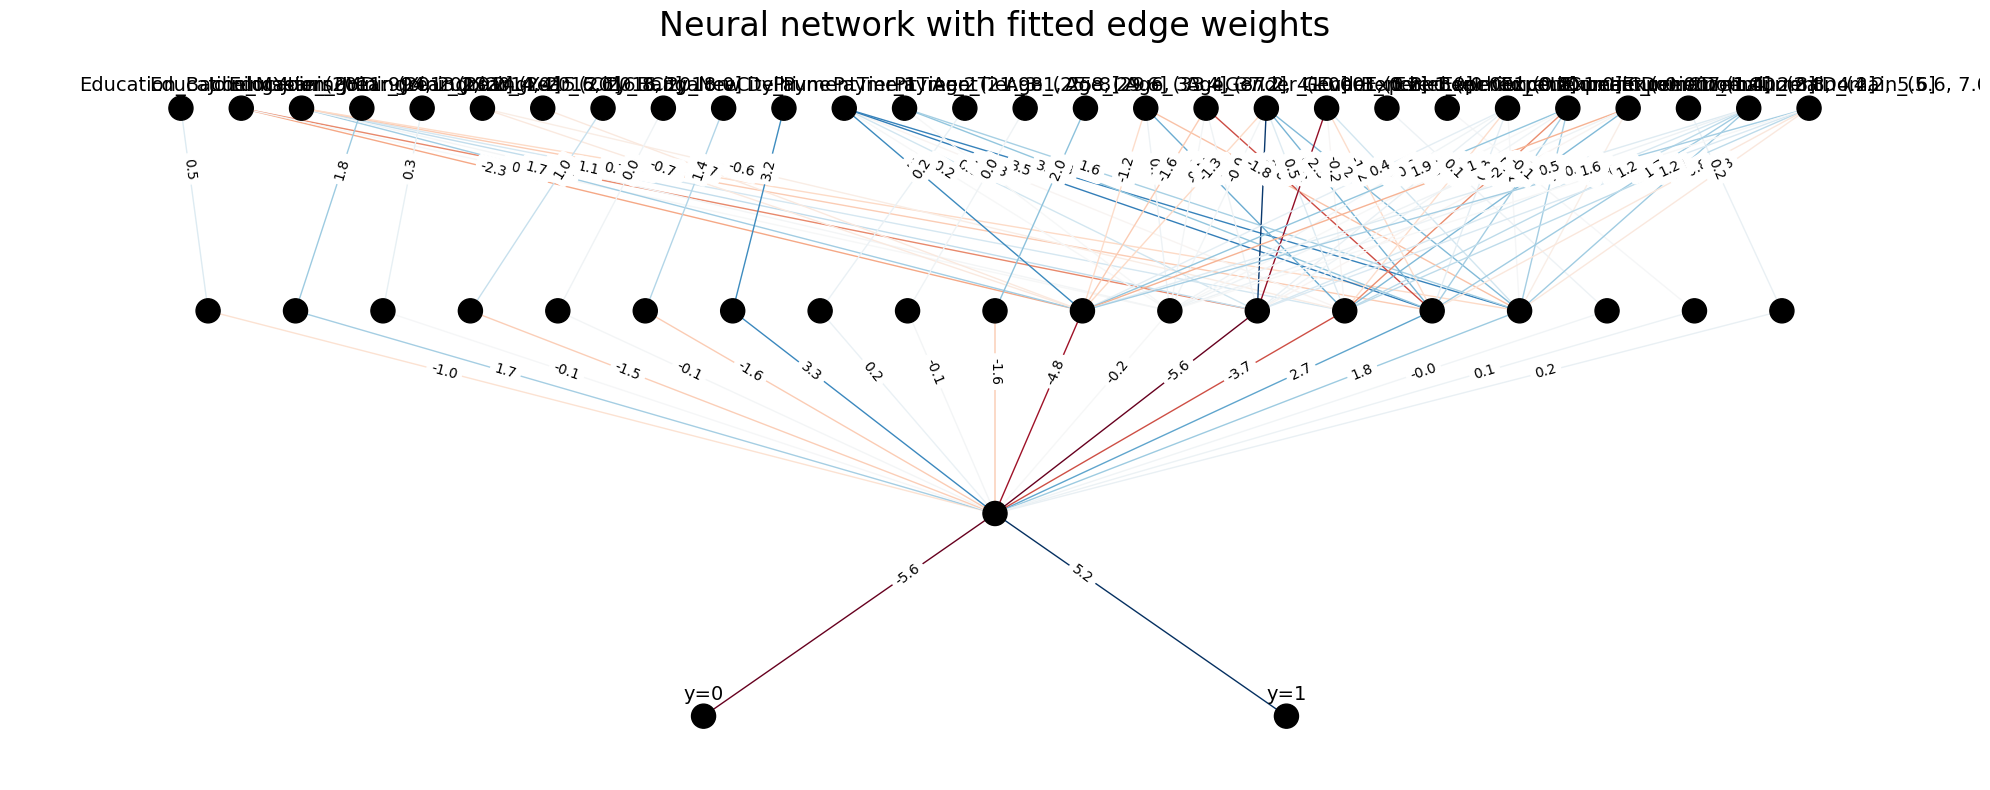

In [225]:
visualizer(cn_0,save=True,name=0)

## Quantile binarization

In [231]:
X_bin1 = X.copy()
X_bin1['ExperienceInCurrentDomain'] = pd.qcut(X_bin1.ExperienceInCurrentDomain,[0,0.5,1]).astype(str)
X_bin1['Age'] = pd.qcut(X_bin1.Age,[0, .25, .5, .75, 1.]).astype(str)
X_bin1['JoiningYear'] = pd.qcut(X_bin1.JoiningYear,[0, .25, .5, .75, 1.]).astype(str)

In [232]:
from sklearn.compose import ColumnTransformer

cat_features = list(X_bin1.select_dtypes(object).columns)
ct = ColumnTransformer([('encode_cats', OneHotEncoder(), cat_features)],
                       remainder='passthrough')
X_bin1 = pd.DataFrame(ct.fit_transform(X_bin1), columns = ct.get_feature_names_out())
X_bin1 = X_bin1.astype(bool)
X_bin1.index = X_bin1.index.map(str)

In [233]:
X_bin1.shape

(4653, 21)

In [234]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_bin1, y, test_size=0.2,shuffle=True,random_state=100)

In [235]:
K_train_1, L_1, cn_1 = build_ConceptNetwork(X_train1, y_train1,score_func=f1_score, concepts_count=10)

In [238]:
cn_1.fit(X_train1, y_train1,n_epochs=10000)

print('Class predictions \n', cn_1.predict(X_test1).numpy().astype(bool))
print('True classes \n', y_test1.values)

print("\nF1 score =", f1_score(y_test1.values, cn_1.predict(X_test1).numpy()))

Class predictions 
 [False  True False False False False False False  True  True False False
 False  True False False False False False False False False  True False
  True False False False False False  True False False  True False False
 False False  True  True  True False  True False False  True  True  True
  True False False  True False False False False False  True  True False
  True False False  True  True  True False False False False False  True
 False False False False False False False  True False False False False
 False  True False  True False False  True False False False False False
 False False False False False  True False False False False False False
  True False False False False False False False False False False False
  True False False  True  True False False False False  True  True False
 False False  True  True  True False False False False False False False
  True False False False  True  True  True False False  True  True False
 False False False False False 

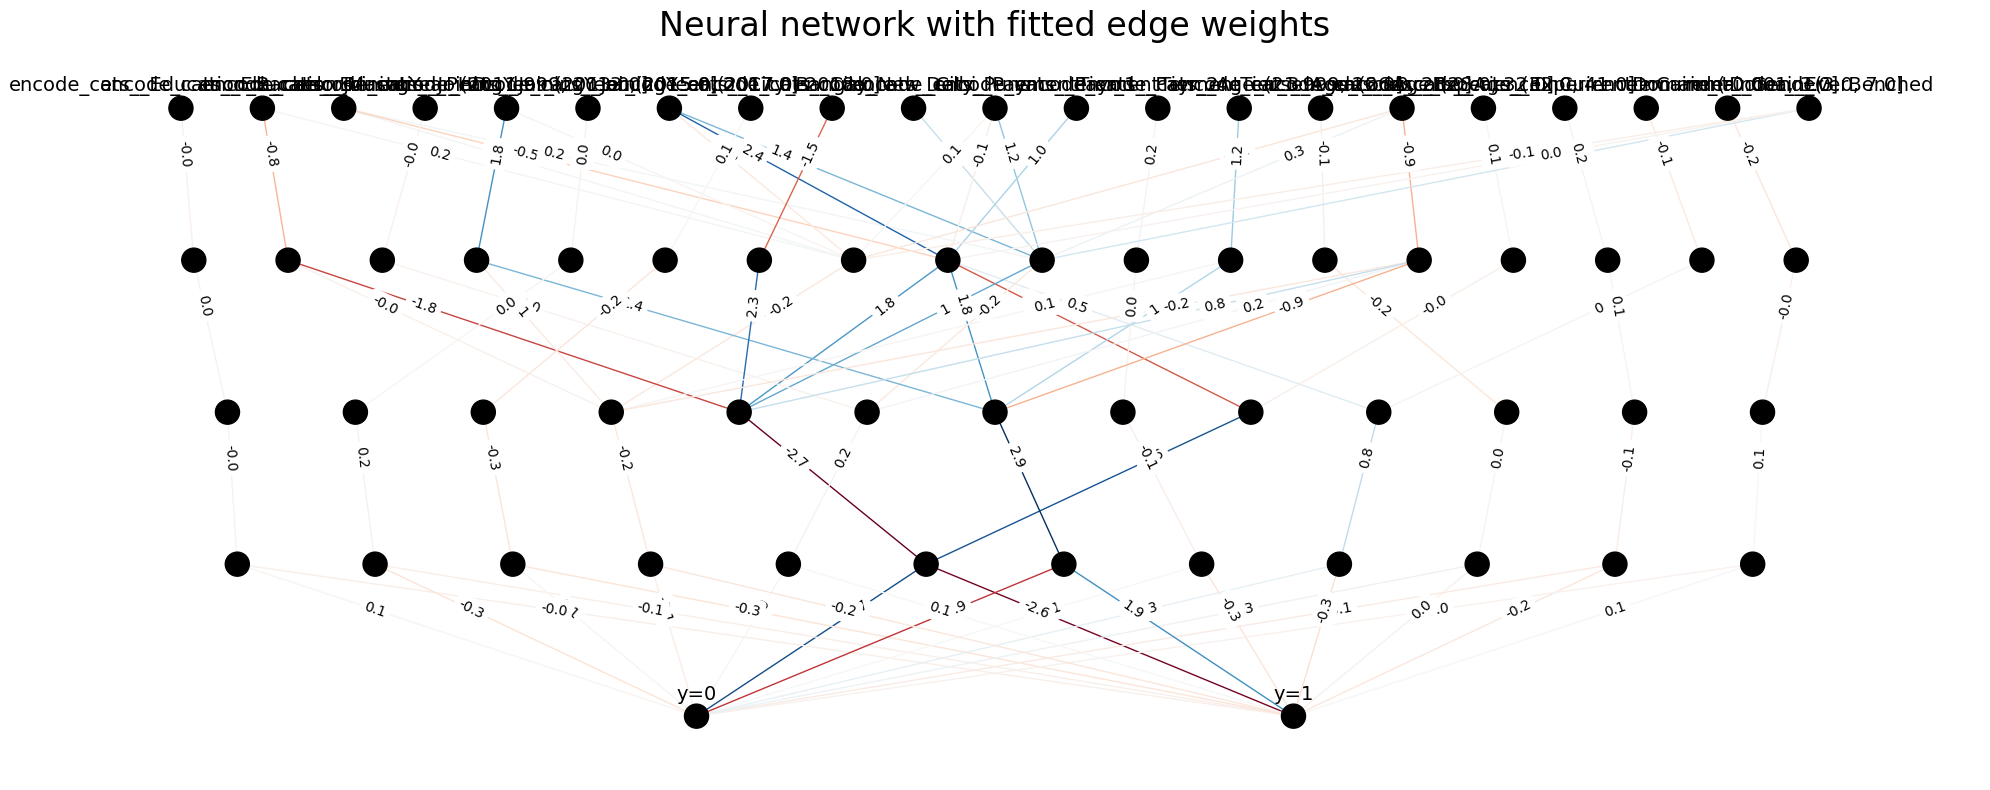

In [240]:
visualizer(cn_1,save=True,name=1)

In [242]:
cn_1.fit(X_train1, y_train1, nonlinearity=torch.nn.Tanh)

print('Class predictions \n', cn_1.predict(X_test1).numpy().astype(bool))
print('True classes \n', y_test1.values)
print("\nF1 score =", f1_score(y_test1.values, cn_1.predict(X_test1).numpy()))

Class predictions 
 [False  True False False False False False False  True  True False False
 False  True False False False False False False False False  True False
  True False False False False False  True False False  True False False
 False False  True  True  True False  True  True False  True  True False
  True False False False False False False False False  True False False
  True False False  True  True False False False False False False  True
 False False False False False False  True  True False False False False
 False  True False  True False False  True False False False False False
 False  True False False False  True False False False False False False
  True False False False False False False False False False False False
  True False False  True  True False False False False  True  True False
 False False  True  True  True False False False False False False  True
  True False False False  True  True  True False  True  True False False
 False False False False False 

In [241]:
cn_1.fit(X_train1, y_train1, nonlinearity=torch.nn.GELU)

print('Class predictions \n', cn_1.predict(X_test1).numpy().astype(bool))
print('True classes \n', y_test1.values)
print("\nF1 score =", f1_score(y_test1.values, cn_1.predict(X_test1).numpy()))

Class predictions 
 [False  True False False False False False False  True  True False False
 False  True False False False False False False False False False False
  True False False False False False  True False False  True False False
 False False  True  True  True False  True False False  True  True  True
 False False False False False  True False False False False  True False
  True False False  True  True  True False False False False False  True
 False False False False False False False  True False False False False
 False False False False False False  True False False False False False
 False False False False False  True False False False False False False
  True False False False False False False False False False False False
  True False False  True  True False False False False  True False False
 False False  True  True  True False False False False False False False
  True False False False  True  True  True False False  True False False
 False False False False  True 